# The Battle of the Neighborhoods - Week 2

## Introduction: Business Problem

### Background

Toronto is the biggest city in Canada. It is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 in 2016. Toronto is a truly international business center in North America and financial capital of Canada. 

Toronto is also the largest centre of education, research and innovation in Canada. The education system combines the Public and Privates schools in Toronto, both elementary and secondary, All schools take their curricular mandate from the Ontario Ministry of Education.

There are four types of school boards in Ontario. Depends on individual student language, religious background or choice, students can attend English Public, English Catholic, French Public, or French Catholic schools.

Publicly funded education is divided into three stages: early childhood education, for children from birth to age 6; elementary school, for students from kindergarten to grade 8; and secondary school, for students from grade 9 to 12.

### Business Problem

##### What is EQAO
- The Education Quality and Accountability Office (EQAO) is an an independent government agency of the Government of Ontario. The purpose of EQAO is develops and oversees reading, writing and mathematics tests that Ontario students must take in Grades 3, 6, 9, and 10.
- The EQAO test results give parents, teachers, principals and school boards information about how well students have learned what the province expects them to learn in reading, writing and mathematics.

##### EQAO results
- Only half of Ontario's Grade 6 students met the provincial standards for math in the 2016-2017 academic year, down seven percentage points from 2013. Meanwhile, 62 per cent of Grade 3 students met the provincial math standards, a decrease of five percentage points from 2014.
- For Grade 9 students, only 44 per cent met the standard in the applied math in 2017-2018. That number experienced a decline compare with years in 2013-2014.

##### Impacts
- After the release of results from 2017-2018 year’s EQAO standardized testing, The Ontario Government announced a four-year math strategy. 
- Ontario will spend more than $55 million this year hiring math learning leads for school boards, providing “extensive” training in elementary and secondary schools, and expanding other programs like tutoring.
- A public concern has been raised regarding the 2017-2018 EQAO results. There is growing number of students using or searching for private tutor services. https://www.cbc.ca/news/canada/toronto/ontario-math-curriculum-private-services-1.4445472

### Business Opportunity

Consider to open a after-school tutor service in Toronto? According to the Wall Street Journal’s Smart Money Magazine, now, it could be the perfect time for you to get into the education business.

Let's go to explore data we collect from multiple data sources and arrange them as a data frame for the analysis; so that we can target the recommended locations across different areas according to what we discover from the collected data.

## Data Description

Data collection and process in most cases require up to 80% time in the whole Data Science project. How data is gathered and analyzed depends on many factors. These factors are including the content, the problems or issues can be identified with some indicators, the datasource integrity, and the size of data. 

There are some aspects should be considered in the data collection for this project. 

- The schools number in a neiboroughood: If the area has numbers of opening schools, particularly those are public schools, the higher demanding needs for tutoring services.
- The school ranking: if the school has lower ranking, then the number of students are looking for tutors services for academy improvement is higher.
- The number of tutor services: to avoid the competition and towards to more successful in business, the area has no or few tutor services business opening could have an opportunity to open one.

There are at least 3 datasource required for this project to provide data analysis and suggestion for business decision.

- Toronto schools Data : This can be collected from Toronto city open dataset, https://www.toronto.ca/city-government/data-research-maps/open-data/. This data provides the number of schools currently opening in Toronto; school name, and addresses.
- Toronto neiboroughood data: This geo data is from Wiki and foursqure API access, we can use it to analyze the school geo location for the potential location to open a business.
- Toronto Schools ratings: The school ranking is the key aspect in this project. Although parents would choose re-locate for a better school for their children, however, it is a time-consuming and stressful process. The ranking data is yearly updated and can be found in the Fraser Institute web site https://www.fraserinstitute.org/school-performance.

## Data preparation

In [2]:
# Import libraries
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library

# Data collection
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

# Map
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Get Toronto Neiboroughood Data

In [3]:
# Collecting toronto neighborhood data
content = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
# parse data from the html into a beautifulsoup object
data = BeautifulSoup(content, 'html.parser')

In [4]:
# Process data to store, initial three empty lists
postalCodeList = []
boroughList = []
neighborhoodList = []

In [5]:
# Loop through table content; store Postal Code, Borough, and Neighborhood data into each list
# <tr><td>M9B</td><td><a href="/wiki/Etobicoke" title="Etobicoke">Etobicoke</a></td><td><a class="mw-redirect" href="/wiki/Islington,_Toronto" title="Islington, Toronto">Islington</a></td></tr>
for row in data.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        postalCodeList.append(cells[0].text)
        boroughList.append(cells[1].text)
        neighborhoodList.append(cells[2].text.rstrip('\n'))

In [6]:
# Define a dataframe consist data of three columns: PostalCode, Borough, and Neighborhood
df_toronto = pd.DataFrame({"PostalCode": postalCodeList,
                           "Borough": boroughList,
                           "Neighborhood": neighborhoodList})

df_toronto.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [7]:
# Ignore cells with a borough that is Not assigned.
df_toronto_dropna = df_toronto[df_toronto.Borough != "Not assigned"].reset_index(drop=True)
#df_toronto_dropna.head(10)

# Group neighborhoods that are in the same boroug
df_toronto_grouped = df_toronto_dropna.groupby(["PostalCode", "Borough"], as_index=False).agg(lambda x: ", ".join(x))
df_toronto_grouped.head(10)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [8]:
# For those "Not assigned" neighborhood, fill neighborhood with same name as the borough
for index, row in df_toronto_grouped.iterrows():
    if row["Neighborhood"] == "Not assigned":
        row["Neighborhood"] = row["Borough"]
        
df_toronto_grouped.tail(10)

,PostalCode,Borough,Neighborhood
93,M9A,Etobicoke,Islington Avenue
94,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ..."
95,M9C,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol..."
96,M9L,North York,Humber Summit
97,M9M,North York,"Emery, Humberlea"
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."
102,M9W,Etobicoke,Northwest


In [9]:
# Print the number rows of dataframe
df_toronto_grouped.shape

(103, 3)

In [10]:
# Load cvs file that has the geographical coordinates of each postal code
coordinates = pd.read_csv("Geospatial_Coordinates.csv")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
# Make column name consistent
coordinates.rename(columns={"Postal Code": "PostalCode"}, inplace=True)

In [12]:
# Merge two dataframes; groupd by postal code
df_toronto_coordinates = df_toronto_grouped.merge(coordinates, on="PostalCode", how="left")
df_toronto_coordinates.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [13]:
# Laverage geopy library to get the latitude and longitude values of Toronto
address = 'Toronto, Ontario'
# Define geo user agent
geolocator = Nominatim(user_agent="toronto_explorer")

# get the geographical coordinates of Toronto
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [14]:
# Assign geo location variable to neighborhood
neighborhood_latitude = latitude
neighborhood_longitude = longitude

In [15]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

In [16]:
# add markers to map, use dataframe df_toronto_coordinates from part2
for lat, lng, borough, neighborhood in zip(df_toronto_coordinates['Latitude'], df_toronto_coordinates['Longitude'], df_toronto_coordinates['Borough'], df_toronto_coordinates['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Leverage Foursquare API to explore the neighborhoods

In [17]:
# Leverage Foursquare API to explore the neighborhoods
# Defince Foursquare constants
CLIENT_ID = 'RP3BUFDNLXHK1UUETESUVFWFQRKH4NI1GG1RR5BCE5LWIR03' # your Foursquare ID
CLIENT_SECRET = 'TQ1GIAA3GING3RH5PMMXTC3CFUASDKT0F1UHEIL5OXYRAWEJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RP3BUFDNLXHK1UUETESUVFWFQRKH4NI1GG1RR5BCE5LWIR03
CLIENT_SECRET:TQ1GIAA3GING3RH5PMMXTC3CFUASDKT0F1UHEIL5OXYRAWEJ


In [18]:
# add markers to map, use dataframe df_toronto_coordinates from part2
for lat, lng, borough, neighborhood in zip(df_toronto_coordinates['Latitude'], df_toronto_coordinates['Longitude'], df_toronto_coordinates['Borough'], df_toronto_coordinates['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [19]:
# Explore the first neighborhood in the dataframe
df_toronto_coordinates.loc[0, 'Neighborhood']

'Rouge, Malvern'

In [20]:
# Get the top 100 venues that are in Toronto within a radius of 500 meters
# Create the GET request URL. Name your URL url
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=RP3BUFDNLXHK1UUETESUVFWFQRKH4NI1GG1RR5BCE5LWIR03&client_secret=TQ1GIAA3GING3RH5PMMXTC3CFUASDKT0F1UHEIL5OXYRAWEJ&ll=43.653963,-79.387207&v=20180605&radius=500&limit=100'

In [21]:
# GET request and examine the resutls
results = requests.get(url).json()
#results
venues = results['response']['groups'][0]['items']
#venues

#### Leverage some functions learned from course

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get Toronto Schools data

In [23]:
# Load cvs file that has the Toronto schools data for all type
schools = pd.read_csv("Toronto-School-Locations.csv")
schools.head()

,_id,OBJECTID,GEO_ID,NAME,SCHOOL_LEVEL,SCHOOL_TYPE,BOARD_NAME,SOURCE_ADDRESS,SCHOOL_TYPE_DESC,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LATITUDE,LONGITUDE,geometry
0,3868,1,7963754,Avondale Public School,NaN,EP,Toronto District School Board,25 Bunty Lane,English Public,7963754,25,Bunty Lane,25 Bunty Lane,M2K 1W4,North York,Toronto,Bayview Middle School,102001,7963734,25,NaN,NaN,NaN,5064,314026.623,4848287.934,43.776502,-79.385190,"{u'type': u'Point', u'coordinates': (-79.38518..."
1,3869,2,7315504,Avondale Secondary Alternative School,NaN,EP,Toronto District School Board,24 Silverview Dr,English Public,7315504,24,Silverview Dr,24 Silverview Dr,M2M 2B3,North York,Toronto,Griffin Centre,102001,7315505,24,NaN,NaN,NaN,6720,311879.691,4849375.563,43.786315,-79.411846,"{u'type': u'Point', u'coordinates': (-79.41184..."
2,3870,3,20258267,AYJ Global Academy,NaN,PR,NaN,4 Lansing Sq,Priv,20258267,4,Lansing Sq,4 Lansing Sq,M2J 5A2,North York,Toronto,NaN,104008,438287,4,NaN,NaN,NaN,6007,318854.727,4848028.516,43.774091,-79.325220,"{u'type': u'Point', u'coordinates': (-79.32521..."
3,3871,4,7102999,Bais Brucha School,NaN,PR,NaN,3077 Bathurst St,Priv,7102999,3077,Bathurst St,3077 Bathurst St,M6A 1Z9,North York,Toronto,NaN,104008,7102975,3077,NaN,NaN,NaN,436,310459.388,4841999.775,43.719936,-79.429570,"{u'type': u'Point', u'coordinates': (-79.42956..."
4,3872,5,9171677,Bais Chaya Mushka Elementary School,NaN,PR,NaN,4375 Chesswood Dr,Priv,9171677,4375,Chesswood Dr,4375 Chesswood Dr,M3J 2C2,North York,Toronto,NaN,115001,9171675,4375,NaN,NaN,NaN,5187,306600.741,4846528.168,43.760717,-79.477445,"{u'type': u'Point', u'coordinates': (-79.47744..."


In [24]:
# Only keep the columns we need
schools_new=schools.drop(['_id', 'OBJECTID', 'GEO_ID', 'CITY', 'LO_NUM', 'LO_NUM_SUF', 'HI_NUM', 'HI_NUM_SUF', 'CENTRELINE_ID', 'X', 'Y', 'geometry','LINEAR_NAME_ID', 'GENERAL_USE_CODE', 'PLACE_NAME', 'LINEAR_NAME_FULL','SCHOOL_LEVEL', 'BOARD_NAME', 'ADDRESS_POINT_ID', 'SCHOOL_TYPE', 'ADDRESS_NUMBER'], axis=1)


In [26]:
schools_new.head(10)

,NAME,SOURCE_ADDRESS,SCHOOL_TYPE_DESC,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,LATITUDE,LONGITUDE
0,Avondale Public School,25 Bunty Lane,English Public,25 Bunty Lane,M2K 1W4,North York,43.776502,-79.385190
1,Avondale Secondary Alternative School,24 Silverview Dr,English Public,24 Silverview Dr,M2M 2B3,North York,43.786315,-79.411846
2,AYJ Global Academy,4 Lansing Sq,Priv,4 Lansing Sq,M2J 5A2,North York,43.774091,-79.325220
3,Bais Brucha School,3077 Bathurst St,Priv,3077 Bathurst St,M6A 1Z9,North York,43.719936,-79.429570
4,Bais Chaya Mushka Elementary School,4375 Chesswood Dr,Priv,4375 Chesswood Dr,M3J 2C2,North York,43.760717,-79.477445
5,Bais Chomesh High School for Girls,3600 Bathurst St,Priv,3600 Bathurst St,M6A 2C9,North York,43.731124,-79.433080
6,Bais Yaakov Elementary School,15 Saranac Blvd,Priv,15 Saranac Blvd,M6A 2G4,North York,43.721429,-79.431869
7,Baitul Mukarram Academy School,3334 Danforth Ave,Priv,3334 Danforth Ave,M1L 1C6,Scarborough,43.693739,-79.278141
8,Bala Avenue Community School,6 Bala Ave,English Public,6 Bala Ave,M6M 2E1,York,43.689471,-79.499016
9,Balmy Beach Community School,14 Pine Ave,English Public,14 Pine Ave,M4E 1L6,former Toronto,43.676436,-79.289827


In [27]:
schools_new.shape

(1281, 8)

In [28]:
#schools_new.tail()
# clean up
schools_new_dropna = schools_new[schools_new.SCHOOL_TYPE_DESC != "University"].reset_index(drop=True)
schools_new_dropna.shape

(1273, 8)

In [29]:
schools_new_dropna = schools_new_dropna[schools_new_dropna.SCHOOL_TYPE_DESC != "College"].reset_index(drop=True)
schools_new_dropna.shape

(1250, 8)

In [30]:
schools_new_dropna = schools_new_dropna[schools_new_dropna.POSTAL_CODE != " "].reset_index(drop=True)
schools_new_dropna.shape

(1250, 8)

In [31]:
# Loop through df_toronto_coordinates, find neighborhood name list base on postal code
neighborhood_list = []

for index, row in schools_new_dropna.iterrows():
    post_code = row['POSTAL_CODE']
    #short = post_code.split(' ')
    short = str(post_code[:3])
    #print(post_code)
    neighborhood = row['MUNICIPALITY']
    for index2, row2 in df_toronto_coordinates.iterrows():
        if(short == row2['PostalCode']):
            neighborhood = row2['Neighborhood']
    #print(neighborhood)
    neighborhood_list.append(neighborhood)
    #print(len(neighborhood_list))       

print(len(neighborhood_list))
    

1250


In [32]:
# Remove dupliucated column
schools_new_update = schools_new_dropna.drop(['SOURCE_ADDRESS'], axis=1)

schools_new_update.head()

,NAME,SCHOOL_TYPE_DESC,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,LATITUDE,LONGITUDE
0,Avondale Public School,English Public,25 Bunty Lane,M2K 1W4,North York,43.776502,-79.385190
1,Avondale Secondary Alternative School,English Public,24 Silverview Dr,M2M 2B3,North York,43.786315,-79.411846
2,AYJ Global Academy,Priv,4 Lansing Sq,M2J 5A2,North York,43.774091,-79.325220
3,Bais Brucha School,Priv,3077 Bathurst St,M6A 1Z9,North York,43.719936,-79.429570
4,Bais Chaya Mushka Elementary School,Priv,4375 Chesswood Dr,M3J 2C2,North York,43.760717,-79.477445


In [33]:
# Add Neighborhood data to each school
schools_new_update['Neighborhood'] = neighborhood_list

In [34]:
schools_new_update.head(10)

,NAME,SCHOOL_TYPE_DESC,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,LATITUDE,LONGITUDE,Neighborhood
0,Avondale Public School,English Public,25 Bunty Lane,M2K 1W4,North York,43.776502,-79.385190,Bayview Village
1,Avondale Secondary Alternative School,English Public,24 Silverview Dr,M2M 2B3,North York,43.786315,-79.411846,"Newtonbrook, Willowdale"
2,AYJ Global Academy,Priv,4 Lansing Sq,M2J 5A2,North York,43.774091,-79.325220,"Fairview, Henry Farm, Oriole"
3,Bais Brucha School,Priv,3077 Bathurst St,M6A 1Z9,North York,43.719936,-79.429570,"Lawrence Heights, Lawrence Manor"
4,Bais Chaya Mushka Elementary School,Priv,4375 Chesswood Dr,M3J 2C2,North York,43.760717,-79.477445,"Northwood Park, York University"
5,Bais Chomesh High School for Girls,Priv,3600 Bathurst St,M6A 2C9,North York,43.731124,-79.433080,"Lawrence Heights, Lawrence Manor"
6,Bais Yaakov Elementary School,Priv,15 Saranac Blvd,M6A 2G4,North York,43.721429,-79.431869,"Lawrence Heights, Lawrence Manor"
7,Baitul Mukarram Academy School,Priv,3334 Danforth Ave,M1L 1C6,Scarborough,43.693739,-79.278141,"Clairlea, Golden Mile, Oakridge"
8,Bala Avenue Community School,English Public,6 Bala Ave,M6M 2E1,York,43.689471,-79.499016,"Del Ray, Keelesdale, Mount Dennis, Silverthorn"
9,Balmy Beach Community School,English Public,14 Pine Ave,M4E 1L6,former Toronto,43.676436,-79.289827,The Beaches


#### Get schools ranking data

In [35]:
# import library to read excel datafile 
from pandas import ExcelWriter
from pandas import ExcelFile

In [36]:
# Load school ranking excel 
ranking_df = pd.read_excel('Toronto_schools_ranking_2017-2018.xlsx', sheet_name='Sheet1')

ranking_df.head()

,2017-18 Rank,Trend,School Name,Postal Code,City,2017-18 Rating
0,1/3046,NaN,Avondale Alternative,M2N 2V4,Toronto,10.0
1,1/3046,NaN,Havergal,M5N2H9,Toronto,10.0
2,1/3046,NaN,Islamic Institute of Toronto,M1X 1S3,Toronto,10.0
3,1/3046,NaN,Northmount,M3B 1S3,Toronto,10.0
4,1/3046,NaN,Sathya Sai,M1R 4E5,Toronto,10.0


In [37]:
jr_ranking_list = []

for index, row in ranking_df.iterrows():
    ranking_l = row['2017-18 Rank']
    #short = post_code.split(' ')
    ranking_s = ranking_l.split('/')
    #print(ranking_s[0])
    jr_ranking_list.append(ranking_s[0])

In [38]:
ranking_df['Ranking'] = jr_ranking_list

In [39]:
ranking_df.rename(columns={"2017-18 Rating": "Rating"}, inplace=True)
ranking_df['Ranking'] = ranking_df['Ranking'].astype(float)

In [40]:
ranking_df.head()

,2017-18 Rank,Trend,School Name,Postal Code,City,Rating,Ranking
0,1/3046,NaN,Avondale Alternative,M2N 2V4,Toronto,10.0,1.0
1,1/3046,NaN,Havergal,M5N2H9,Toronto,10.0,1.0
2,1/3046,NaN,Islamic Institute of Toronto,M1X 1S3,Toronto,10.0,1.0
3,1/3046,NaN,Northmount,M3B 1S3,Toronto,10.0,1.0
4,1/3046,NaN,Sathya Sai,M1R 4E5,Toronto,10.0,1.0


In [41]:
%matplotlib inline

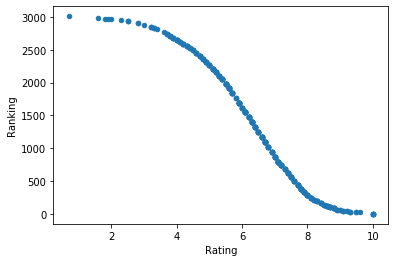

In [42]:
ranking_df.plot.scatter(x='Rating', y='Ranking')

In [43]:
# Load toronto secondary school ranking excel
sr_ranking_df = pd.read_excel('Toronto_Sr_schools_ranking_2017-2018.xlsx', sheet_name='Sheet1')

sr_ranking_df.head()

,2017-18 Rank,Trend,School Name,Postal Code,City,2017-18 Rating
0,1/738,NaN,Havergal,M5N2H9,Toronto,10.0
1,3/738,—,St Michael's Choir,M5B1X2,Toronto,9.6
2,3/738,NaN,Ursula Franklin,M6P3J7,Toronto,9.6
3,7/738,—,North Toronto,M4P1T7,Toronto,9.2
4,14/738,—,Cardinal Carter-Arts,M2N3C8,Toronto,8.8


In [44]:
# clean up
ranking_df_new = ranking_df.drop(['Trend'], axis=1)
ranking_df_new.head()

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking
0,1/3046,Avondale Alternative,M2N 2V4,Toronto,10.0,1.0
1,1/3046,Havergal,M5N2H9,Toronto,10.0,1.0
2,1/3046,Islamic Institute of Toronto,M1X 1S3,Toronto,10.0,1.0
3,1/3046,Northmount,M3B 1S3,Toronto,10.0,1.0
4,1/3046,Sathya Sai,M1R 4E5,Toronto,10.0,1.0


In [46]:
sr_ranking_list = []

for index, row in sr_ranking_df.iterrows():
    ranking_sl = row['2017-18 Rank']
    #short = post_code.split(' ')
    ranking_i = ranking_sl.split('/')
    #print(ranking_i[0])
    sr_ranking_list.append(ranking_i[0])

In [47]:
sr_ranking_df['Ranking'] = sr_ranking_list
sr_ranking_df.rename(columns={"2017-18 Rating": "Rating"}, inplace=True)

In [48]:
sr_ranking_df_new = sr_ranking_df.drop(['Trend'], axis=1)
sr_ranking_df_new.head()

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking
0,1/738,Havergal,M5N2H9,Toronto,10.0,1
1,3/738,St Michael's Choir,M5B1X2,Toronto,9.6,3
2,3/738,Ursula Franklin,M6P3J7,Toronto,9.6,3
3,7/738,North Toronto,M4P1T7,Toronto,9.2,7
4,14/738,Cardinal Carter-Arts,M2N3C8,Toronto,8.8,14


In [52]:
sr_ranking_df['Ranking'] = sr_ranking_df['Ranking'].astype(float)

In [53]:
import seaborn as sns

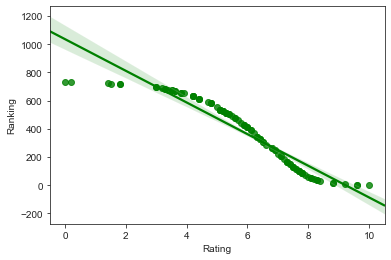

In [54]:
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='Rating', y='Ranking', color='g', data=sr_ranking_df)

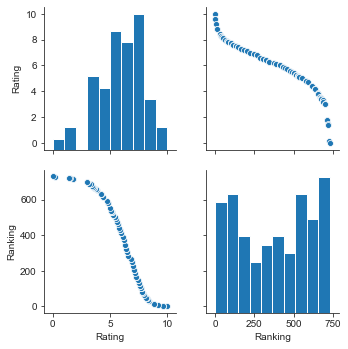

In [55]:
sns.pairplot(sr_ranking_df)

In [56]:
# print the number of JR and SR ranking data
ranking_df_new.shape

(441, 6)

In [57]:
sr_ranking_df_new.shape

(107, 6)

We can tell the two ranking datasets are imbalanced, therefore we need to keep the dataset seperated. We also need to have Neighborhood data to ranking. 
- for those containing ranking data, take ranking data
- if not ranking data provided, take average, the mean

In [58]:
# function to fetch Neighborhood data
def get_neighborhood_list(df1, df2):
    neighborhoodList = []
    for index, row in df1.iterrows():
        post_code = row['Postal Code']
        short = str(post_code[:3])
        neighbor = ""
        for index2, row2 in df2.iterrows():
            if(short == row2['PostalCode']):
                neighbor = row2['Neighborhood']
            print(neighbor)
        neighborhoodList.append(neighbor)
        #print(neighborhoodList)
    return neighborhoodList

In [60]:
# Get Neighborhood data for ranking Jr schools
jr_neighborhood_list = []

for index, row in ranking_df_new.iterrows():
    post_code = row['Postal Code']
    #short = post_code.split(' ')
    short = str(post_code[:3])
    #print(short)
    for index2, row2 in df_toronto_coordinates.iterrows():
        if(short == row2['PostalCode']):
            neighborhood = row2['Neighborhood']
            #print("short : {} and neighborhood: {}".format(short, neighborhood))
    #print(neighborhood)
    jr_neighborhood_list.append(neighborhood)
   

In [61]:
# Add Neighborhood data to each JR school
ranking_df_new['Neighborhood'] = jr_neighborhood_list

In [62]:
ranking_df_new.head(10)

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood
0,1/3046,Avondale Alternative,M2N 2V4,Toronto,10.0,1.0,Willowdale South
1,1/3046,Havergal,M5N2H9,Toronto,10.0,1.0,Roselawn
2,1/3046,Islamic Institute of Toronto,M1X 1S3,Toronto,10.0,1.0,Upper Rouge
3,1/3046,Northmount,M3B 1S3,Toronto,10.0,1.0,Don Mills North
4,1/3046,Sathya Sai,M1R 4E5,Toronto,10.0,1.0,"Maryvale, Wexford"
5,1/3046,St Sebastian,M6H 3P1,Toronto,10.0,1.0,"Dovercourt Village, Dufferin"
6,23/3046,Nile Academy,M9M 1W5,Toronto,9.6,23.0,"Emery, Humberlea"
7,25/3046,Fleming,M1B 5B5,Toronto,9.5,25.0,"Rouge, Malvern"
8,25/3046,Whitney,M4T 1C7,Toronto,9.5,25.0,"Moore Park, Summerhill East"
9,34/3046,Denlow,M3B 1P7,Toronto,9.3,34.0,Don Mills North


In [63]:
# use function to process same process
sr_neighborhood_list = get_neighborhood_list(sr_ranking_df_new, df_toronto_coordinates)

#print(sr_neighborhood_list)
































































Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn
Roselawn






















































Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden District
Ryerson, Garden Distric

Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside
Leaside












Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agin

Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West
Willowdale West















L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreau

Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods
Parkwoods















L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreau



















Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown






























































































Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park














Agincourt North

Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt
Agincourt




















Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, York Mills
Silver Hills, Y

L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
L'Amoreaux West
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge, Malvern
Rouge

Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Town Centre, Wexford Heights
Dorset Park, Scarborough Tow









































Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks
Caledonia-Fairbanks




































































































Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips


































































In [64]:
print(sr_neighborhood_list)

['Roselawn', 'Ryerson, Garden District', 'High Park, The Junction South', 'Davisville North', 'Willowdale South', 'Bathurst Manor, Downsview North, Wilson Heights', "Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea", 'Willowdale South', 'Ryerson, Garden District', 'Hillcrest Village', 'Leaside', 'Agincourt', 'Dovercourt Village, Dufferin', 'High Park, The Junction South', 'North Toronto West', 'The Beaches', 'Humber Bay Shores, Mimico South, New Toronto', 'Islington Avenue', 'Dovercourt Village, Dufferin', 'Harbord, University of Toronto', 'Studio District', 'Dovercourt Village, Dufferin', "Agincourt North, L'Amoreaux East, Milliken, Steeles East", 'Willowdale West', "L'Amoreaux West", 'Rosedale', 'Clairlea, Golden Mile, Oakridge', 'The Beaches', 'Agincourt', 'Roselawn', 'Davisville North', 'Cliffcrest, Cliffside, Scarborough Village West', 'Flemingdon Park, Don Mills South', "Humber Bay, King's Mill 

In [66]:
# Add Neighborhood data to each SR school
sr_ranking_df_new['Neighborhood'] = sr_neighborhood_list

sr_ranking_df_new.tail(10)

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood
97,686/738,John Polanyi,M6A1B1,Toronto,3.3,686,"Lawrence Heights, Lawrence Manor"
98,689/738,Westview Centennial,M3N1W7,Toronto,3.2,689,Downsview Northwest
99,699/738,Weston,M9N2Y9,Toronto,3.0,699,Weston
100,699/738,Downsview,M3K1W3,Toronto,3.0,699,"CFB Toronto, Downsview East"
101,716/738,George Harvey,M6M3W5,Toronto,1.8,716,"Del Ray, Keelesdale, Mount Dennis, Silverthorn"
102,716/738,Emery,M9M2V9,Toronto,1.8,716,"Emery, Humberlea"
103,720/738,Oakwood,M6E1A3,Toronto,1.5,720,Caledonia-Fairbanks
104,722/738,Kipling,M9R1H4,Toronto,1.4,722,"Kingsview Village, Martin Grove Gardens, Richv..."
105,729/738,Central,M5S2R5,Toronto,0.2,729,"Harbord, University of Toronto"
106,731/738,Bendale,M1P3C1,Toronto,0.0,731,"Dorset Park, Scarborough Town Centre, Wexford ..."


In [68]:
# the average rating for JR and SR
ranking_df_new.loc[:,"Rating"].mean()

6.362131519274376

In [74]:
# the average rating for SR
sr_ranking_df_new.loc[:,"Rating"].mean()

5.878504672897195

Now we know the the consider Neighborhoods are those schools which rating are below average

In [76]:
# select low rating school
jr_low_df = ranking_df_new[ranking_df_new['Rating'] < 5]

jr_low_df.head()

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood
353,2315/3046,Charles E Webster,M6M3X7,Toronto,4.9,2315.0,"Del Ray, Keelesdale, Mount Dennis, Silverthorn"
354,2315/3046,Fairmount,M1M1C7,Toronto,4.9,2315.0,"Cliffcrest, Cliffside, Scarborough Village West"
355,2315/3046,Our Lady of Guadalupe Catholic,M2J3C2,Toronto,4.9,2315.0,"Fairview, Henry Farm, Oriole"
356,2315/3046,St Bernard,M6M4W4,Toronto,4.9,2315.0,"Del Ray, Keelesdale, Mount Dennis, Silverthorn"
357,2315/3046,St Charles,M6B2W1,Toronto,4.9,2315.0,Glencairn


In [77]:
jr_low_df.shape

(88, 7)

In [78]:
sr_low_df = sr_ranking_df_new[sr_ranking_df_new['Rating'] < 5.878]

sr_low_df.head()

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood
59,443/738,Pope John Paul II,M1E4P6,Toronto,5.8,443,"Guildwood, Morningside, West Hill"
60,461/738,Danforth,M4J4B7,Toronto,5.7,461,East Toronto
61,477/738,Wexford Collegiate-Arts,M1R2H7,Toronto,5.6,477,"Maryvale, Wexford"
62,477/738,St Basil The Great,M9M3B2,Toronto,5.6,477,"Emery, Humberlea"
63,492/738,Delphi Alternative,M1S2R7,Toronto,5.5,492,Agincourt


In [79]:
sr_low_df.shape

(48, 7)

In [80]:
# Apply geo data to those two lower ranking school dataset so that we can view them on map
# Creat a function return related geo data and Borough

def get_geo_data(df1, df2):
    lat_list = []
    lng_list = []
    post_code_list = []
    borough_list = []
    d = {}
    for index, row in df1.iterrows():
        post_code = row['Postal Code']
        short = str(post_code[:3])
        lat_i = "NA"
        lng_i = "NA"
        borough_i = "NA"
        for index2, row2 in df2.iterrows():
            post_code_2 = row2['POSTAL_CODE']
            short_2 = str(post_code_2[:3])
            if(short == short_2):
                lat_i = row2['LATITUDE']
                lng_i = row2['LONGITUDE']
                borough_i = row2['MUNICIPALITY']
            #print("lat : {} and lng: {}".format(lat_i, lng_i))
        lat_list.append(lat_i)
        lng_list.append(lng_i)
        post_code_list.append(post_code)
        borough_list.append(borough_i)
    #print("lat len: {} and lng len: {}".format(len(lat_list), len(lng_list)))
    d = {'Postal Code':post_code_list,'Borough':borough_list,'Latitude':lat_list,'Longitude':lng_list}
    return pd.DataFrame(d)

In [81]:
#jr_low_df.shape
jr_low_geo_df = get_geo_data(jr_low_df, schools_new_update)

In [82]:
jr_low_geo_df.head()

,Postal Code,Borough,Latitude,Longitude
0,M6M3X7,York,43.690287,-79.476243
1,M1M1C7,Scarborough,43.715646,-79.242479
2,M2J3C2,North York,43.781941,-79.348741
3,M6M4W4,York,43.690287,-79.476243
4,M6B2W1,North York,43.717388,-79.435480


In [83]:
# Merge two dataframe
updated_jr_low_df = jr_low_df.merge(jr_low_geo_df, on="Postal Code", how="left")

In [85]:
updated_jr_low_df.head(10)

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood,Borough,Latitude,Longitude
0,2315/3046,Charles E Webster,M6M3X7,Toronto,4.9,2315.0,"Del Ray, Keelesdale, Mount Dennis, Silverthorn",York,43.690287,-79.476243
1,2315/3046,Fairmount,M1M1C7,Toronto,4.9,2315.0,"Cliffcrest, Cliffside, Scarborough Village West",Scarborough,43.715646,-79.242479
2,2315/3046,Our Lady of Guadalupe Catholic,M2J3C2,Toronto,4.9,2315.0,"Fairview, Henry Farm, Oriole",North York,43.781941,-79.348741
3,2315/3046,St Bernard,M6M4W4,Toronto,4.9,2315.0,"Del Ray, Keelesdale, Mount Dennis, Silverthorn",York,43.690287,-79.476243
4,2315/3046,St Charles,M6B2W1,Toronto,4.9,2315.0,Glencairn,North York,43.717388,-79.435480
5,2315/3046,Tam O'Shanter,M1T2V3,Toronto,4.9,2315.0,"Clarks Corners, Sullivan, Tam O'Shanter",Scarborough,43.800624,-79.301345
6,2315/3046,Walter Perry,M1K4M7,Toronto,4.9,2315.0,"East Birchmount Park, Ionview, Kennedy Park",Scarborough,43.733465,-79.251249
7,2361/3046,Carleton Village,M6N2Z4,Toronto,4.8,2361.0,"The Junction North, Runnymede",York,43.673121,-79.499085
8,2361/3046,Elmbank,M9V3R4,Toronto,4.8,2361.0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Etobicoke,43.730931,-79.586709
9,2361/3046,Greenholme,M9V3M5,Toronto,4.8,2361.0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Etobicoke,43.730931,-79.586709


In [86]:
# create map of Toronto using latitude and longitude values
jr_school_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

In [87]:
# add markers to map, use dataframe df_toronto_coordinates from part2
for lat_jr, lng_jr, borough_jr, neighborhood_jr in zip(updated_jr_low_df['Latitude'], updated_jr_low_df['Longitude'], updated_jr_low_df['Borough'], updated_jr_low_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood_jr, borough_jr)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat_jr, lng_jr],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(jr_school_map_toronto)  
    
jr_school_map_toronto

In [88]:
# same as to SR schools
sr_low_geo_df = get_geo_data(sr_low_df, schools_new_update)

In [89]:
sr_low_geo_df.head()

,Postal Code,Borough,Latitude,Longitude
0,M1E4P6,Scarborough,43.768514,-79.165034
1,M4J4B7,East York,43.691928,-79.348158
2,M1R2H7,Scarborough,43.740199,-79.303731
3,M9M3B2,North York,43.749191,-79.532014
4,M1S2R7,Scarborough,43.787004,-79.248054


In [90]:
# Merge two dataframe
updated_sr_low_df = sr_low_df.merge(sr_low_geo_df, on="Postal Code", how="left")

updated_sr_low_df.tail()

,2017-18 Rank,School Name,Postal Code,City,Rating,Ranking,Neighborhood,Borough,Latitude,Longitude
43,716/738,Emery,M9M2V9,Toronto,1.8,716,"Emery, Humberlea",North York,43.749191,-79.532014
44,720/738,Oakwood,M6E1A3,Toronto,1.5,720,Caledonia-Fairbanks,former Toronto,43.677385,-79.444437
45,722/738,Kipling,M9R1H4,Toronto,1.4,722,"Kingsview Village, Martin Grove Gardens, Richv...",Etobicoke,43.690831,-79.548997
46,729/738,Central,M5S2R5,Toronto,0.2,729,"Harbord, University of Toronto",former Toronto,43.669236,-79.389922
47,731/738,Bendale,M1P3C1,Toronto,0.0,731,"Dorset Park, Scarborough Town Centre, Wexford ...",Scarborough,43.747906,-79.278150


In [91]:
# create map of Toronto using latitude and longitude values
sr_school_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

In [92]:
# add markers to map, use dataframe df_toronto_coordinates from part2
for lat_sr, lng_sr, borough_sr, neighborhood_sr in zip(updated_sr_low_df['Latitude'], updated_sr_low_df['Longitude'], updated_sr_low_df['Borough'], updated_sr_low_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood_sr, borough_sr)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat_sr, lng_sr],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sr_school_map_toronto)  
    
sr_school_map_toronto

In [93]:
# Let us look into both result to see if there are neighborhoods appears both JR and SR dataframe

low_jr_neighborhoods_name_list = updated_jr_low_df['Neighborhood'].tolist()
#low_jr_neighborhood_name_list

In [94]:
# function to remove duplicated neighborhood name from list
def remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [95]:
# remove duplicated neighborhood
removed_jr_neighborhoods_name_list = remove(low_jr_neighborhoods_name_list)
#removed_jr_neighborhoods_name_list

In [96]:
# loop through SR dataframe to look for the same neighborhood
neighborhood_list_on_both = []

for i in range(len(removed_jr_neighborhoods_name_list)):
    neighborhood_name = removed_jr_neighborhoods_name_list[i]
    founded = ""
    #print(short)
    for index, row in updated_sr_low_df.iterrows():
        if(neighborhood_name == row['Neighborhood']):
            founded = row['Neighborhood']
            #print(founded)
    if(len(founded) > 0):
        neighborhood_list_on_both.append(founded)

In [97]:
neighborhood_list_on_both

['Del Ray, Keelesdale, Mount Dennis, Silverthorn',
 'Cliffcrest, Cliffside, Scarborough Village West',
 'Glencairn',
 'East Birchmount Park, Ionview, Kennedy Park',
 'Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown',
 'Downsview, North Park, Upwood Park',
 'Emery, Humberlea',
 'Rouge, Malvern',
 'East Toronto',
 'Church and Wellesley',
 'Christie',
 'Caledonia-Fairbanks',
 'Downsview Northwest',
 'Dovercourt Village, Dufferin',
 'Dorset Park, Scarborough Town Centre, Wexford Heights',
 'Parkwoods',
 'Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips',
 'Harbord, University of Toronto',
 'Runnymede, Swansea',
 'Guildwood, Morningside, West Hill',
 'Woburn',
 'Maryvale, Wexford',
 'Agincourt',
 'Northwest',
 "L'Amoreaux West",
 'Brockton, Exhibition Place, Parkdale Village',
 'Newtonbrook, Willowdale']

## Results

After analyzed the data I collected from trusted resouce (see Data Prepartion section), to answer the in our business use case  

#### Which areas or neighborhoods in Toronto are ideal locations to open a after-school tutor service?

Here are the locations can be considered to open one.

'Del Ray, Keelesdale, Mount Dennis, Silverthorn',
 'Cliffcrest, Cliffside, Scarborough Village West',
 'Glencairn',
 'East Birchmount Park, Ionview, Kennedy Park',
 'Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown',
 'Downsview, North Park, Upwood Park',
 'Emery, Humberlea',
 'Rouge, Malvern',
 'East Toronto',
 'Church and Wellesley',
 'Christie',
 'Caledonia-Fairbanks',
 'Downsview Northwest',
 'Dovercourt Village, Dufferin',
 'Dorset Park, Scarborough Town Centre, Wexford Heights',
 'Parkwoods',
 'Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips',
 'Harbord, University of Toronto',
 'Runnymede, Swansea',
 'Guildwood, Morningside, West Hill',
 'Woburn',
 'Maryvale, Wexford',
 'Agincourt',
 'Northwest',
 "L'Amoreaux West",
 'Brockton, Exhibition Place, Parkdale Village',
 'Newtonbrook, Willowdale'